# Titanic passengers survival Kaggle competition

In this notebook we will conduct data analysis and predictive modelling of Titanic passengers survival dataset for Kaggle [Titanic dataset](https://www.kaggle.com/c/titanic).

Titanic passengers survival dataset is one of the most canonical data analysis and machine learning datasets. Let's see how this data looks like, investigate main trends in it and try to predict survival chances of passengers based on numerous features.

The main steps of the analysis process we will conduct are:
1. Frame the problem, pose
2. Get the data
3. Explore the data
4. Prepare the data for machine learning algorithms
5. Select a model and train it
6. Fine-tune the model
7. Submit solution

## 1. Frame the problem

Titanic sinking was one of the biggest shipwreck tragedies in history. It killed 1502 out of 2224 passengers. This tragedy led to better safety regulations for ships. The main reason for such a great death toll was not enough number of lifeboats to fit all passengers. This can lead to the conclusion that some groups of people were more likely to survive than others - woman, children and upper-class passeners for example.

### 1.1 The goal

The goal of this analysis is two fold. Firstly, we want to analyse the data set, explore it answering related questions using statistical methods and data visualization. Secondly our goal is to predict which passengers were likely to survive Titanic catastrophy and which not. For each PassengerId in the provided unlabeled test set, we want to predict a whether given passenger survived or not.

### 1.2 Analysis

There are several questions we would like to answer with Titanic dataset analysis.

Questions

As a final result for this goal will be summary of found interesting analysis results.

### 1.3 Modeling

As for second goal, since we are given multiple features data with labeled survival values this is clearly an supervised learning problem. Moreover we try to predict discrete categorical value: 0 or 1 (representing not-survived and survived passenger). This tells us that we deal here with binary categorization problem.

As a measure of created machine learning models performance we choose the percentage of passengers we correctly predict, that is accuracy level.

As a final product we need to submit a csv file with exactly 418 entried plus a header row. The file should have exactly 2 columns:
* PassengerId (sorted in any order)
* Survived (contains your binary predictions: 1 for survived, 0 for deceased)

The example submission dataset should look like this:
```
PassengerId,Survived
 892,0
 893,1
 894,0
 Etc.
```

## 2. Get the data

### 2.1 Download and load the data.

We first download the dataset from Kaggle website. Let's start by looking at the data description from Kaggle.

In [1]:
!cat datasets/data_description.txt

Data Dictionary:
survival	Survival		0 = No, 1 = Yes
pclass		Ticket class		1 = 1st, 2 = 2nd, 3 = 3rd
sex		Sex	
Age             Age in years	
sibsp		# of siblings / spouses aboard the Titanic	
parch		# of parents / children aboard the Titanic	
ticket		Ticket number	
fare		Passenger fare	
cabin		Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes:
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

We see all the details we need to understand data notation here.

We also know that the data has been already split for us into two groups:
* training set (train.csv)
* test set (test.csv)
That is why we do not have to prepare test dataset in this analysis. 

We are now ready to load and look at our dataset.

In [50]:
import pandas as pd

titanic_train = pd.read_csv("datasets/train.csv")

### 2.2 Take a quick look at the data

Let's see how our data looks like.

In [51]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's first make `PassengerId` our index column.

In [52]:
titanic_train = titanic_train.set_index("PassengerId")
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see the dataset contains not that many attributes: we have 10 of them. Five of them are numeric: `Pclass` (passenger class), `Age`, `SibSp` (number of siblings/spouses aboard), `Parch` (number of parents/children aboard), `Fare`. Five of them have categorical/text values: `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked` (port of embarkation C=Cherbourg, Q=Queenstown, S=Southampton). Additionaly our dataset the target attribute `Survived` marking whether passenger survived or not with 1 or 0 respectively.

Let's have a closer look at attributes structure.

In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


All in all the dataset contains 891 passengers data out of all 2224 passengers.

We deal here with some missing values. The most missing values are in `Cabin` attribute. That column seems not so much informative and the data if rather scarse which would suggesting droping these feature when preparing training dataset for machine learning. We have also a lot of missing values in `Age` column however this column seems crucial for our analysis. That is why later on we will have to take care of these missing values either by filling them in (e.g. median value) or by dropping examples with missing values. In `Embarked` attribute values we miss only two values so we can easily drop these two cases later on when preparing the dataset for modelling algorithms.

We again see that five attributes have categorical/text values - we will also deal with that later when preparing data for modelling.


Let's now see some details about numerical values we have in the dataset.

In [10]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The only attribute for which calculating statistcal values make sense is `Age` attribute. We see that the mean passenger age was 29.7 years old. The youngest passenger was 0.4 year old and the oldest was 80. We will analyse this demographical passengers structure a bit more later on.

All in all the values look correct and we are ready to move to the data exploration phase.

Let's see categorical attributes unique values.

In [53]:
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [54]:
titanic_train["Ticket"].value_counts()

347082             7
CA. 2343           7
1601               7
3101295            6
347088             6
CA 2144            6
S.O.C. 14879       5
382652             5
347077             4
349909             4
17421              4
PC 17757           4
113760             4
LINE               4
2666               4
4133               4
19950              4
W./C. 6608         4
113781             4
PC 17582           3
PC 17572           3
239853             3
363291             3
35273              3
347742             3
PC 17755           3
PC 17760           3
110152             3
C.A. 34651         3
C.A. 31921         3
                  ..
350050             1
345767             1
3101296            1
A./5. 2152         1
C 4001             1
4138               1
2667               1
C.A. 24580         1
2664               1
2647               1
376566             1
349201             1
SOTON/OQ 392086    1
373450             1
65303              1
382649             1
315090       

In [8]:
titanic_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [9]:
titanic_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

We can see that `Cabin` attribute even though textual is not really a categorical value, meaning that it has multiple (over 600) unique values. That suggests dropping it when preparing data for machine learning algorithms.



Let's also look at the general numeric data distributions.

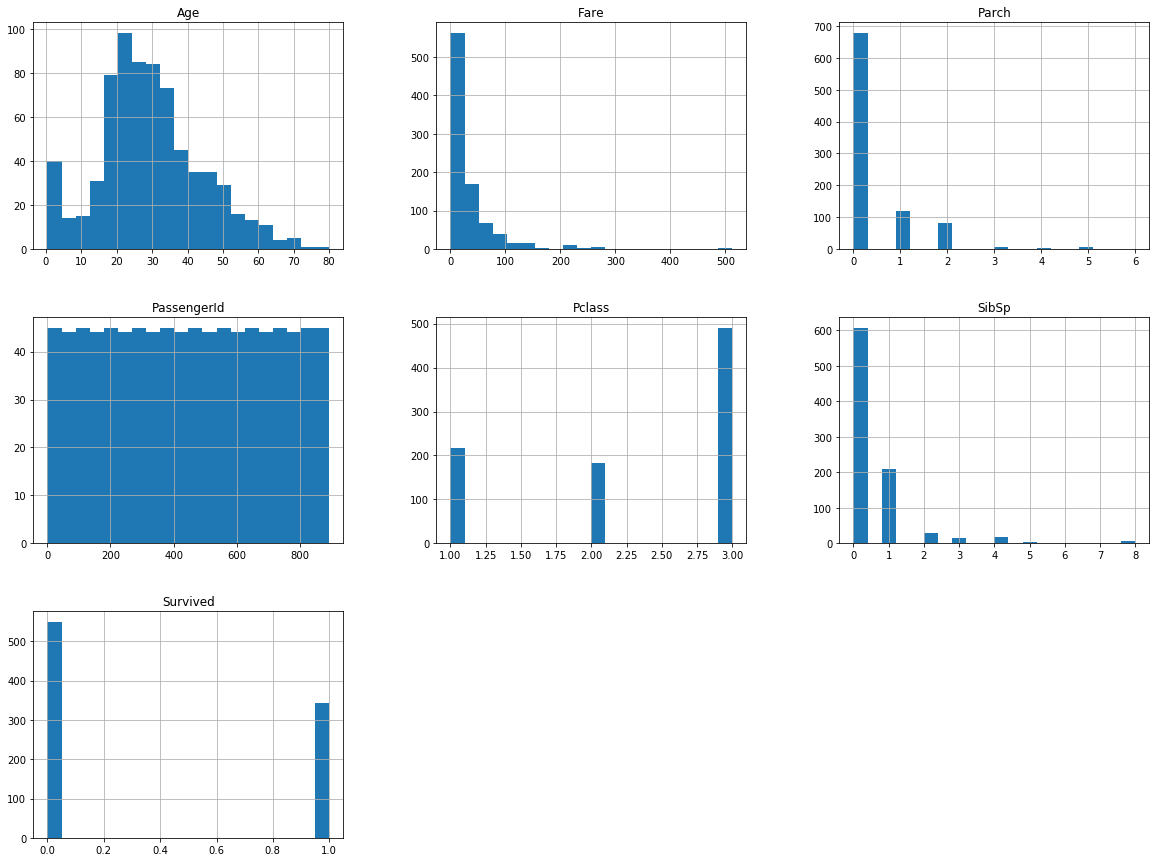

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt

titanic_train.hist(bins=20, figsize=(20, 15))
plt.show()

We notice a few things in these histograms: 
- `Age` distribution is centered around 20-30 years old group ranging to 80 with quite large number of children aged 0-5.
- `Fare` mode value is range from 0-25 meaning that cheapest ticket were the most popular ones and also we have some rather outlier values above 200.
- `Parch` (number of parents/children aboard) distribution mode is 0 by far meaning that most of the passengers traveled without any parents/children and also there are some outlier values with 3 and more parents/children aboard.
- `Pclass` distribution shows that almost 500 out of all 891 passengers in train dataset were travelling the 3rd (lowest) class.
- `SibSp` (number of siblings/spouses aboard) is similar to `Parch` distribution but with larger number of outliers.
- `Survived` obviously shows only two values but we can also see that number of survivors is much smaller than the number of passengers who died.

We can also see here that altough coded as numerical values `Pclass` and `Survived` columns represent categorical data with discrete specific values.

Also value ranges are very different and will have to be standardized later on.


## 3. Explore the data

Let's now dig deeper into data internal structure and values.

Since our dataset is not very large we can compute the correlation coefficient between each numerical attribute.

In [12]:
corr_matrix = titanic_train.corr()

And let's now look at how much each attribute correlates with the survival of the passenger.

In [13]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

We can see some positiobe correlation between `Fare` attribute value and `Survived` value and also even stronger negative correlation between `Pclass` and `Survived` value.

Let's check these relationships using scatterplots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114b92b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11613cef0>]], dtype=object)

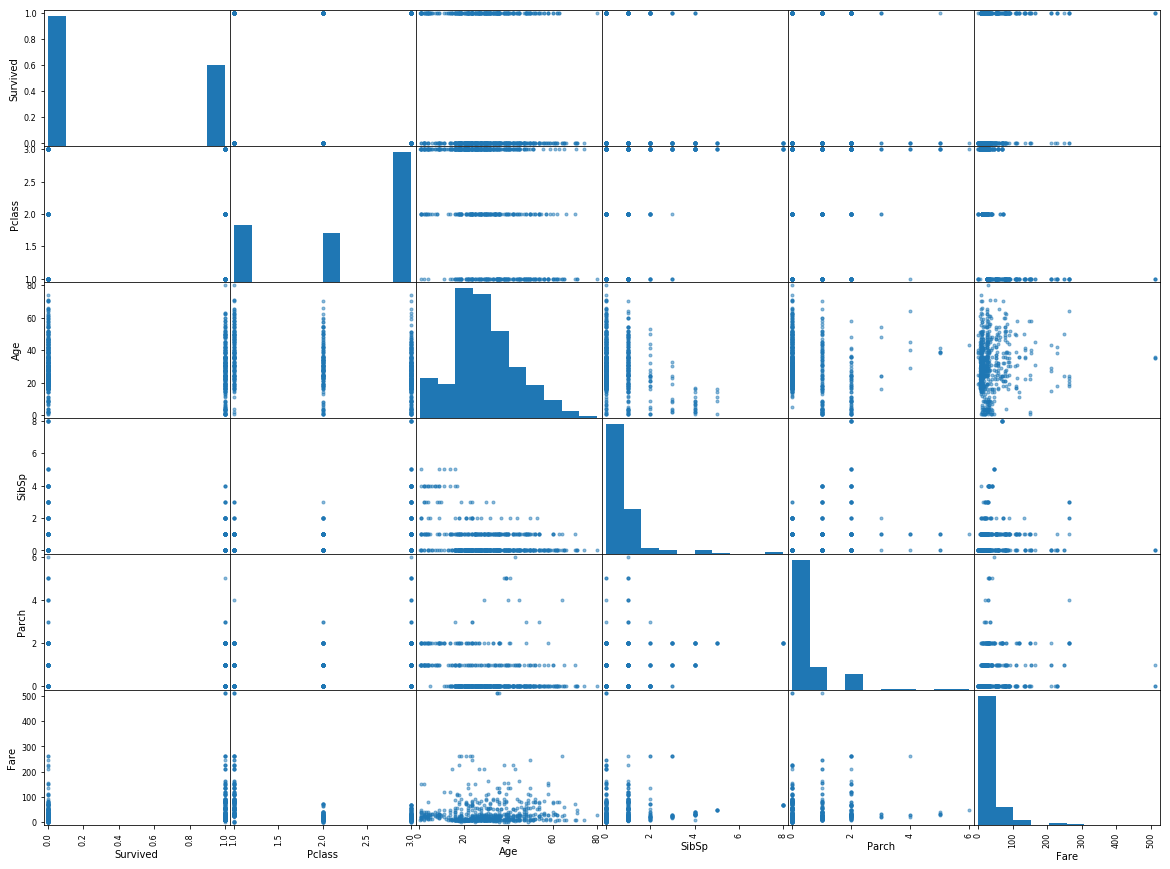

In [14]:
from pandas.tools.plotting import scatter_matrix

attributes = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
scatter_matrix(titanic_train[attributes], figsize=(20, 15))

It is quite difficult to read something informative from scatter plots since some of the data is not continous.


## 4. Prepare the data

We will now prepare the data for machine learning modelling.

Let's start by separating the predictors and labels since we do not want to apply the same transformations to both.

In [15]:
titanic_pred = titanic_train.drop("Survived", axis=1)
titanic_labels = titanic_train["Survived"].copy()

In [16]:
titanic_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


Two attributes seems to be meaningles for machine learning model are `PassengerId` and `Name` which is why let's drop this column. As we have seen earlier analysing text attributes unique values also `Ticket` attribute seems to be meaningless so we also drop its values.

In [17]:
titanic_pred = titanic_pred.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [18]:
titanic_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


Now we need to deal with missing values we found in the dataset. 

Again the most missing value are in `Cabin` column. That column seems not so much informative and the data if rather scarse which would suggesting droping this feature from the training data set. 


In [19]:
titanic_pred = titanic_pred.drop("Cabin", axis=1)

In `Embarked` column features we miss only two values so we can easily drop these two cases.

In [20]:
indexes_to_drop = titanic_pred[titanic_pred["Embarked"].isnull()].index.values
titanic_pred = titanic_pred.drop(indexes_to_drop, axis=0)
titanic_labels = titanic_labels.drop(indexes_to_drop, axis=0)
titanic_pred = titanic_pred.reset_index(drop=True)
titanic_labels = titanic_labels.reset_index(drop=True)

We have also a lot of missing values in `Age` column however this column seems crucial for our analysis. As starter we decide to fill missing values with median value. Other option is to throw away passengers with missing `Age` value, but considering that it is over 80  passengers data record we would like not to do it. 

Median can only be computed on numerical attributes, so we need to make a copy of the data - one containing only numerical data and one containing only categorical data.

In [21]:
titanic_pred_num = titanic_pred.drop(["Sex", "Embarked"], axis=1)
titanic_pred_cat = titanic_pred[["Sex", "Embarked"]]

We have now only 2 categorical attributes since we dropped `Name` (meaningless), `Cabin` (to many missing values) and `Ticket` (meaningless) attributes.

Let's now use Scikit-Learn Imputer class to fill `Age` attribute missing values and to standardize all values.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer 

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
#     ('std_scaler', StandardScaler()),
])
titanic_pred_num_prepared = num_pipeline.fit_transform(titanic_pred_num)

In [23]:
titanic_pred_num_prepared

array([[  3.    ,  22.    ,   1.    ,   0.    ,   7.25  ],
       [  1.    ,  38.    ,   1.    ,   0.    ,  71.2833],
       [  3.    ,  26.    ,   0.    ,   0.    ,   7.925 ],
       ..., 
       [  3.    ,  28.    ,   1.    ,   2.    ,  23.45  ],
       [  1.    ,  26.    ,   0.    ,   0.    ,  30.    ],
       [  3.    ,  32.    ,   0.    ,   0.    ,   7.75  ]])

We have all our numerical attributes ready to go.

Let's now take care of out categorical attributes values.

In [24]:
titanic_pred_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
Sex         889 non-null object
Embarked    889 non-null object
dtypes: object(2)
memory usage: 14.0+ KB


Since most machine learning algorithms do not deal with text data so well let's convert text labels we have to numbers. We will use one-hot encoding for this job. First we will convert our attributes from text categories to integer categories, then from integer categories to one-hot vectors using the LabelBinarizer class.

In [25]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
titanic_pred_cat_sex_1hot = encoder.fit_transform(titanic_pred_cat["Sex"])
encoder = LabelBinarizer()
titanic_pred_cat_embarked_1hot = encoder.fit_transform(titanic_pred_cat["Embarked"])

We now have all our data prepared. The last thing is to combine it again into one data set.

In [26]:
import numpy as np

titanic_pred_prepared = np.concatenate([titanic_pred_num_prepared, titanic_pred_cat_sex_1hot, titanic_pred_cat_embarked_1hot], axis=1)

## 5. Short-list promising models

Our data is prepared so we are ready to fit multiple quick models to check how they behave. Our measure of success is classification accuracy.

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_clf = LogisticRegression()
log_clf.fit(titanic_pred_prepared, titanic_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We will test our model using cross-validation.

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, titanic_pred_prepared, titanic_labels, cv=3, scoring="accuracy")

array([ 0.79124579,  0.79054054,  0.78378378])

Let's try Stochastic Gradient Descent classifier using Scikit-Learn's SGDClassifier class.

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(titanic_pred_prepared, titanic_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

Let's now use cross-validation to validate our model.

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, titanic_pred_prepared, titanic_labels, cv=3, scoring="accuracy")

array([ 0.62626263,  0.7027027 ,  0.72635135])

Another model will be K-Nearest Neighbors classifier.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(titanic_pred_prepared, titanic_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
cross_val_score(knn_clf, titanic_pred_prepared, titanic_labels, cv=3, scoring="accuracy")

array([ 0.68686869,  0.71283784,  0.71621622])

So far the best results we got from Logistic Regression model. Let's try different polynomials versions of it.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features_4 = PolynomialFeatures(degree=4, include_bias=False)
polynomial_features_8 = PolynomialFeatures(degree=8, include_bias=False)

In [35]:
titanic_pred_prepared_poly_2 = polynomial_features_2.fit_transform(titanic_pred_prepared)
titanic_pred_prepared_poly_4 = polynomial_features_4.fit_transform(titanic_pred_prepared)
titanic_pred_prepared_poly_8 = polynomial_features_8.fit_transform(titanic_pred_prepared)

In [36]:
titanic_pred_prepared.shape

(889, 9)

In [37]:
titanic_pred_prepared_poly_2.shape

(889, 54)

In [38]:
titanic_pred_prepared_poly_4.shape

(889, 714)

In [39]:
titanic_pred_prepared_poly_8.shape

(889, 24309)

In [40]:
log_clf_2 = LogisticRegression()
log_clf_2.fit(titanic_pred_prepared_poly_2, titanic_labels)
cross_val_score(log_clf_2, titanic_pred_prepared_poly_2, titanic_labels, cv=3, scoring="accuracy")

array([ 0.80808081,  0.81418919,  0.81418919])

In [41]:
log_clf_4 = LogisticRegression()
log_clf_4.fit(titanic_pred_prepared_poly_4, titanic_labels)
cross_val_score(log_clf_4, titanic_pred_prepared_poly_4, titanic_labels, cv=3, scoring="accuracy")

array([ 0.7037037 ,  0.72635135,  0.71283784])

In [42]:
log_clf_8 = LogisticRegression()
log_clf_8.fit(titanic_pred_prepared_poly_8, titanic_labels)
cross_val_score(log_clf_8, titanic_pred_prepared_poly_8, titanic_labels, cv=3, scoring="accuracy")

array([ 0.63973064,  0.61486486,  0.67567568])

So using square polynomial features and logistic regression model improves results a bit. Using higher degree polynomials lower accuracy result.

TODO: Check why higher degree polynomial lowers accuracy result in cross-validation. Visualize how the decision boundary looks like.

Let's try another - more complex - model. Now we will use Random Forest classifier.

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(titanic_pred_prepared, titanic_labels)
cross_val_score(forest_clf, titanic_pred_prepared, titanic_labels, cv=3, scoring="accuracy")

array([ 0.81481481,  0.78716216,  0.78040541])

No we reached a little bit better accuracy in our model.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])
svm_clf.fit(titanic_pred_prepared, titanic_labels)


Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=6, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(titanic_pred_prepared, titanic_labels)
cross_val_score(poly_kernel_svm_clf, titanic_pred_prepared, titanic_labels, cv=3, scoring="accuracy")

array([ 0.75420875,  0.80405405,  0.78716216])

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))
rbf_kernel_svm_clf.fit(titanic_pred_prepared, titanic_labels)
cross_val_score(rbf_kernel_svm_clf, titanic_pred_prepared, titanic_labels, cv=3, scoring="accuracy")

array([ 0.61616162,  0.61824324,  0.61824324])

## 6. Fine-tune models

We have two promissing models. Let's try to improve their performance by fine-tuning their parameters.

## 7. Submit solution

In [ ]:
titanic_test = pd.read_csv("datasets/test.csv")

In [ ]:
titanic_test = titanic_test.drop(["PassengerId", "Name", "Ticket"], axis=1)
titanic_test = titanic_test.drop("Cabin", axis=1)

In [ ]:
titanic_test_num = titanic_test.drop(["Sex", "Embarked"], axis=1)
titanic_test_cat = titanic_test[["Sex", "Embarked"]]

In [ ]:
titanic_test_num.info()

In [ ]:
imputer = Imputer(strategy="median")
imputer.fit(titanic_test_num)
titanic_test_num_prepared = imputer.transform(titanic_test_num)

In [ ]:
titanic_test_cat.info()

In [ ]:
encoder = LabelBinarizer()
titanic_test_cat_sex_1hot = encoder.fit_transform(titanic_test_cat["Sex"])
encoder = LabelBinarizer()
titanic_test_cat_embarked_1hot = encoder.fit_transform(titanic_test_cat["Embarked"])

In [ ]:
titanic_test_prepared = np.concatenate([titanic_test_num_prepared, titanic_test_cat_sex_1hot, titanic_test_cat_embarked_1hot], axis=1)

In [ ]:
final_predictions = forest_clf.predict(titanic_test_prepared)

In [ ]:
final_df = pd.DataFrame({'PassengerId': range(892, len(final_predictions)+892), 'Survived': final_predictions})
final_df.to_csv("datasets/submission.csv", index=False)

Your submission scored 0.73205 (position 8732).